In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv(r"C:\Users\HP\Downloads\housing.csv") 
df.head() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Removing the null values
df.dropna(inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
#Importing the trian_test_split for splitting the data 
from sklearn.model_selection import train_test_split 
x = df.drop(['median_house_value'],axis=1) 
y = df['median_house_value'] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 
#Joining the training datsets for getting the insights from the data 
train_data = x_train.join(y_train) 
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18551,-122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,NEAR OCEAN,216100.0
13107,-121.37,38.42,18.0,2643.0,502.0,1755.0,541.0,3.3281,INLAND,91200.0
1576,-121.99,37.81,17.0,465.0,83.0,146.0,75.0,4.9018,<1H OCEAN,188500.0
1271,-121.66,37.93,19.0,2055.0,358.0,1064.0,350.0,4.7426,INLAND,263100.0
16130,-122.48,37.78,48.0,2835.0,728.0,1674.0,684.0,3.1290,NEAR BAY,375000.0
...,...,...,...,...,...,...,...,...,...,...
231,-122.20,37.80,46.0,2041.0,405.0,1059.0,399.0,3.8487,NEAR BAY,203300.0
14125,-117.08,32.75,16.0,1111.0,328.0,930.0,303.0,1.2347,NEAR OCEAN,128100.0
8483,-118.29,33.92,34.0,1374.0,240.0,906.0,248.0,5.3292,<1H OCEAN,155500.0
3642,-118.46,34.22,35.0,2288.0,617.0,2222.0,566.0,2.6299,<1H OCEAN,170700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

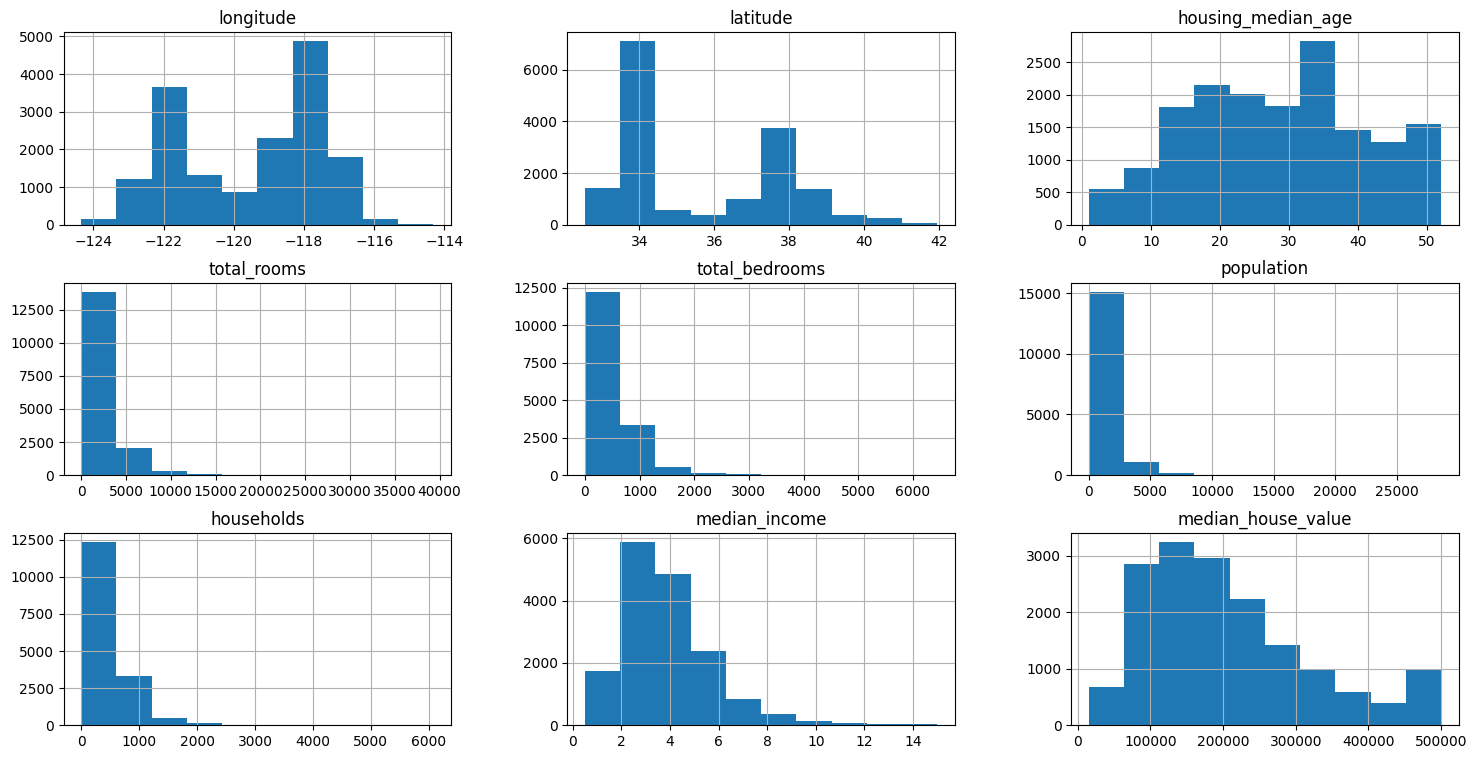

In [9]:
train_data.hist(figsize=(18,9)) 

In [14]:
#Preprocessing 
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1) 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1) 
train_data['population'] = np.log(train_data['population']+1) 
train_data['households'] = np.log(train_data['households']+1) 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

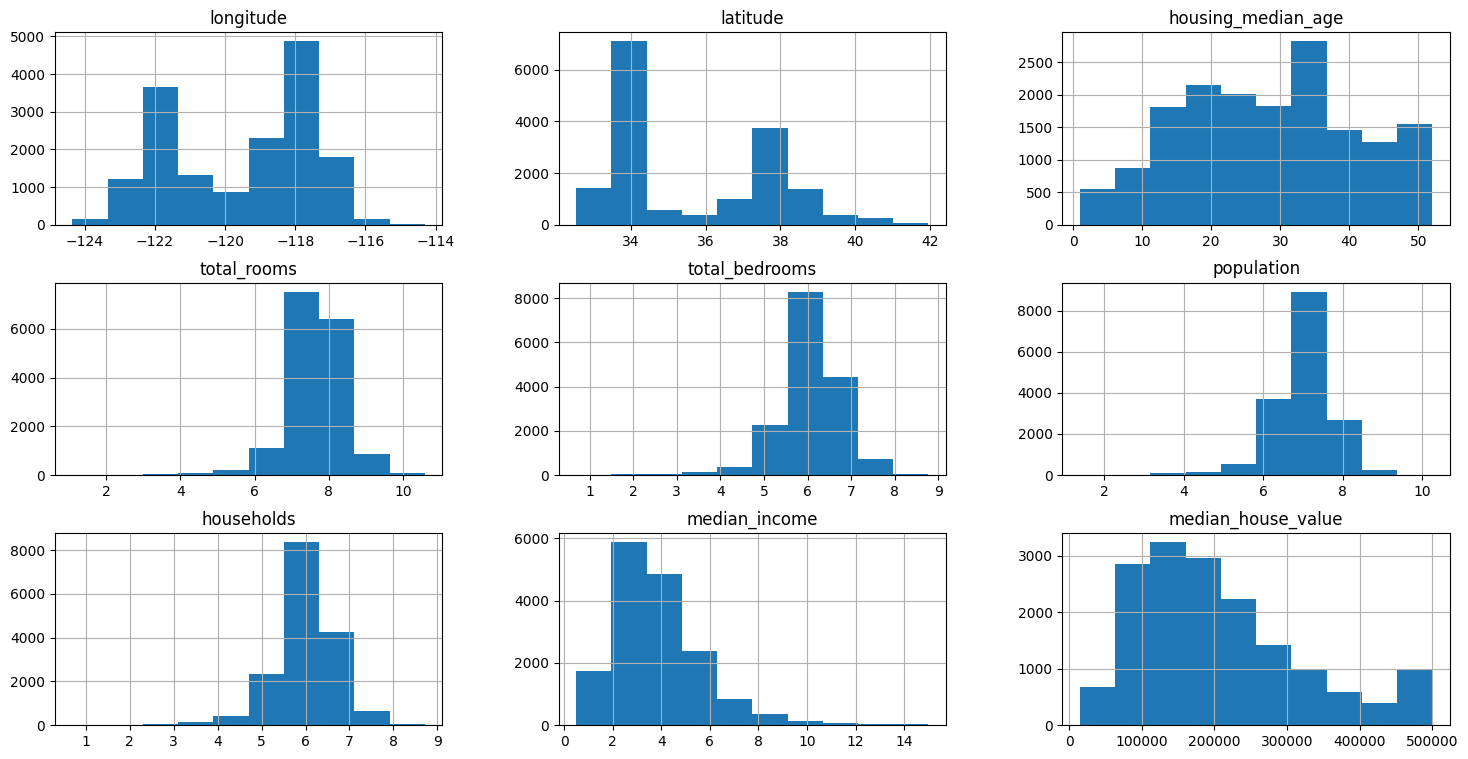

In [15]:
train_data.hist(figsize=(18,9)) 

In [ ]:
# Generate dummies with prefix for clarity
dummies = pd.get_dummies(train_data["ocean_proximity"], prefix="ocean")

# Concatenate instead of join (less error-prone)
train_data = pd.concat([train_data, dummies], axis=1)

# Drop the original categorical column
train_data.drop("ocean_proximity", axis=1, inplace=True) 


<Axes: >

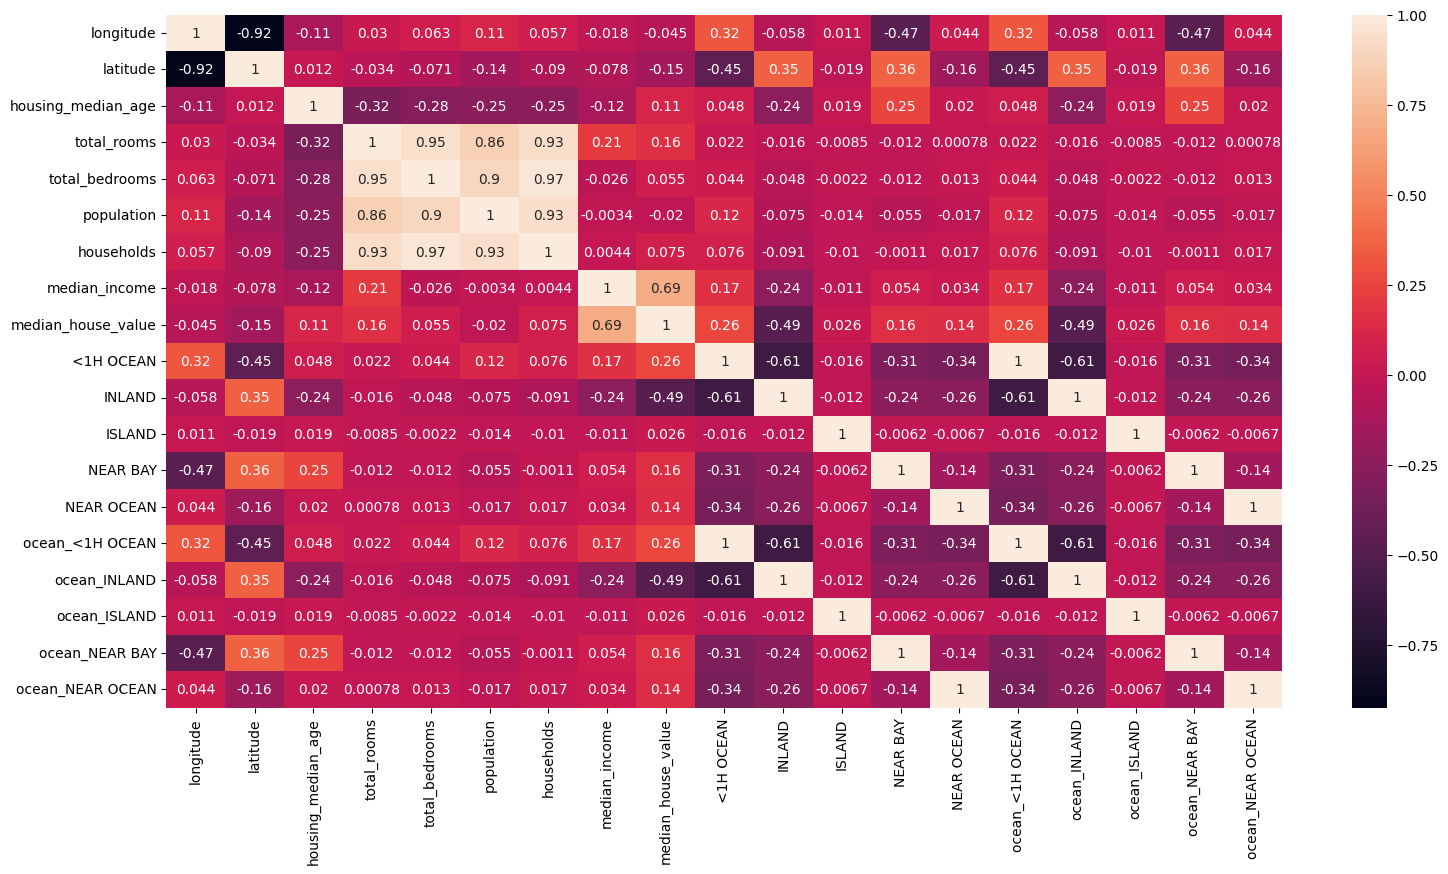

In [32]:
plt.figure(figsize=(18,9))
sns.heatmap(train_data.corr(),annot=True)

In [35]:
x_train,y_train = train_data.drop(['median_house_value'],axis=1) , train_data['median_house_value'] 

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(x_train,y_train) 
reg.score(x_train,y_train)

0.6713238028707494

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

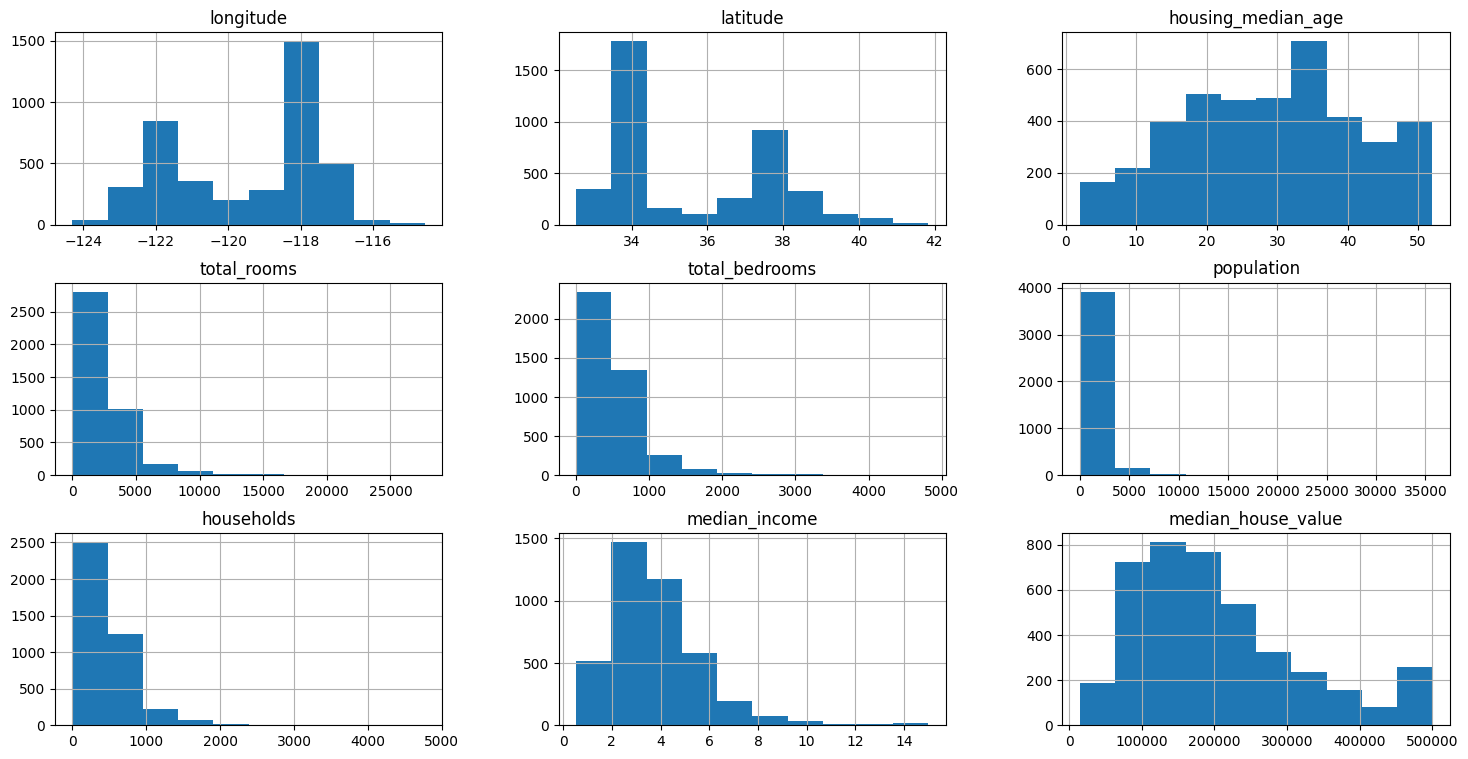

In [43]:
test_data = x_test.join(y_test) 
test_data.hist(figsize=(18,9))  

In [44]:
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1) 
test_data['population'] = np.log(test_data['population']+1) 
test_data['households'] = np.log(test_data['households']+1) 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

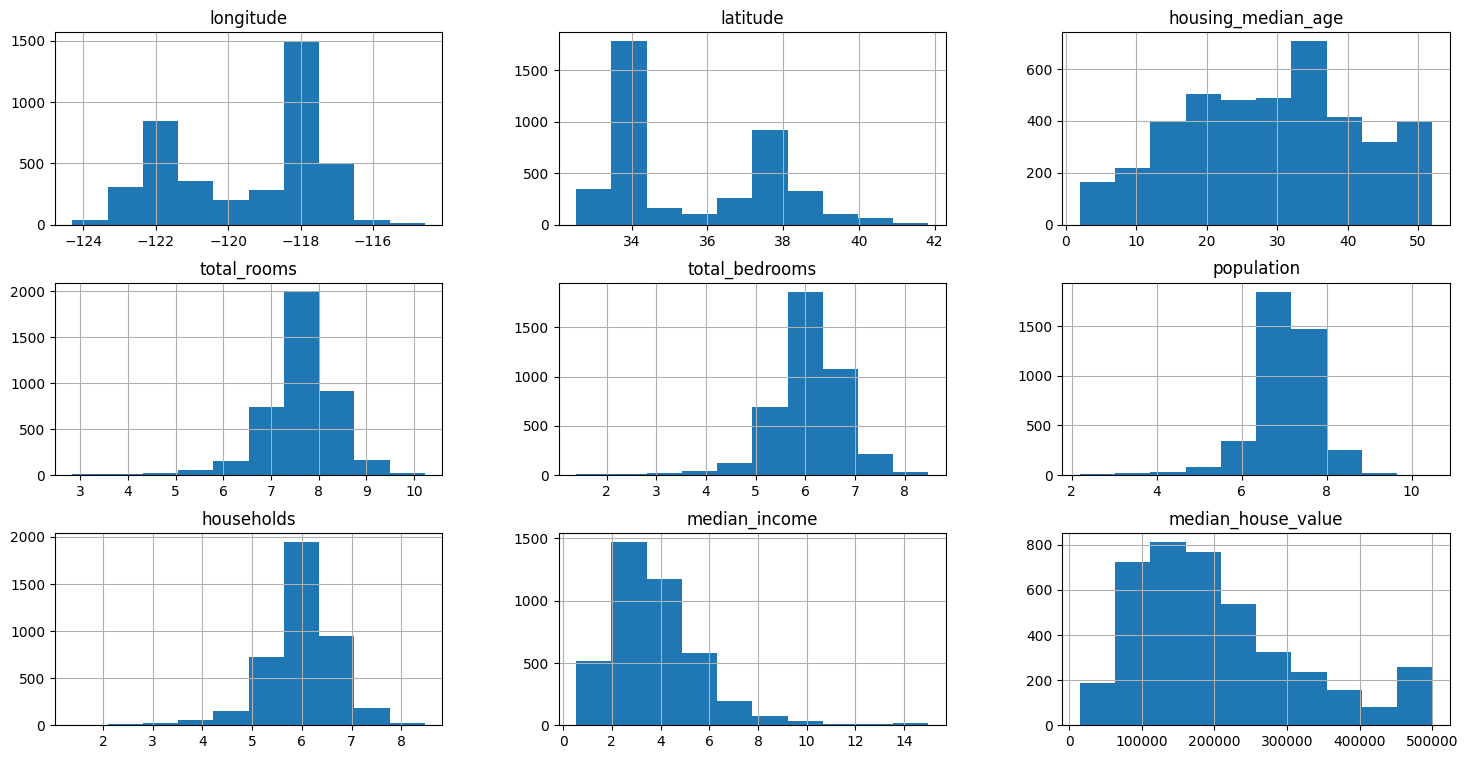

In [45]:
test_data.hist(figsize=(18,9))

In [46]:
# Generate dummies with prefix for clarity
dummies = pd.get_dummies(test_data["ocean_proximity"], prefix="ocean")

# Concatenate instead of join (less error-prone)
test_data = pd.concat([test_data, dummies], axis=1)

# Drop the original categorical column
test_data.drop("ocean_proximity", axis=1, inplace=True) 


<Axes: >

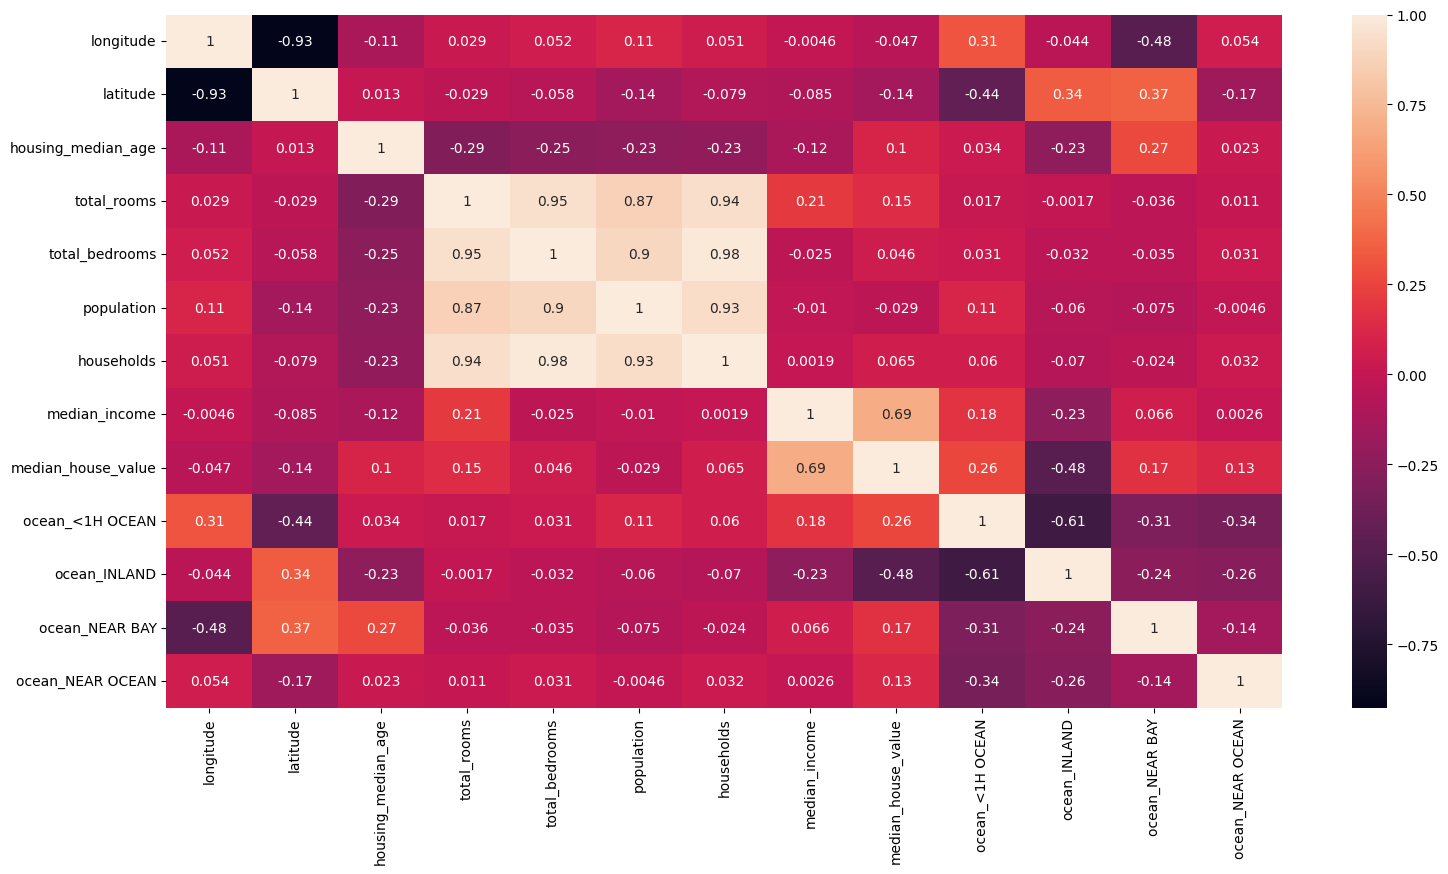

In [48]:
plt.figure(figsize=(18,9))
sns.heatmap(test_data.corr(),annot=True)

In [49]:
x_test,y_test = test_data.drop(['median_house_value'],axis=1) , test_data['median_house_value'] 

In [53]:
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()  
reg1.fit(x_test,y_test)
reg1.score(x_test,y_test)

0.6674752837692854

In [54]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor()
ran.fit(x_test,y_test)
ran.score(x_test,y_test)

0.9687999510693371

In [ ]:
from sklearn.model_selection import GridSearchcv 
forest = RandomForestRegressor() 
param_grid = {
    "n_estimators" : [3,10,30],
    "max_features" : [2,4,6,8] 
} 
gridsearch = GridSearchcv(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True) 
gridsearch.fit(x_train,y_train) 
best = grid_search.best_estimator_
best.score(x_test,y_test)